In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix,f1_score, accuracy_score as acc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
new_data = pd.read_csv("DLBCL.csv")
print(new_data.shape)
new_data.head()

(79, 7071)


,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,class
0,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,...,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,DLBCL FL
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class
2,-1,-45,176,97,-57,233,265,945,56,819,...,1036,-161,1523,-72,897,366,3,76,-28,DLBCL
3,25,-17,531,353,122,155,209,1688,42,639,...,4254,-75,6056,-68,737,81,-4,41,-45,DLBCL
4,73,91,257,80,614,507,760,2252,196,863,...,1934,-129,2901,-9,946,450,38,164,-62,DLBCL


In [4]:
new_data["class"].unique()

array(['DLBCL FL', 'class', 'DLBCL', 'FL'], dtype=object)

In [5]:
new_data["class"].replace({"DLBCL": 1, "FL": 2}, inplace=True)
new_data.head()

,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,class
0,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,...,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,continuous,DLBCL FL
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class
2,-1,-45,176,97,-57,233,265,945,56,819,...,1036,-161,1523,-72,897,366,3,76,-28,1
3,25,-17,531,353,122,155,209,1688,42,639,...,4254,-75,6056,-68,737,81,-4,41,-45,1
4,73,91,257,80,614,507,760,2252,196,863,...,1934,-129,2901,-9,946,450,38,164,-62,1


In [6]:
df = new_data.iloc[2:,:] # Removes first two tubles

print('Required data set ')
df.head()

Required data set 


,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,class
2,-1,-45,176,97,-57,233,265,945,56,819,...,1036,-161,1523,-72,897,366,3,76,-28,1
3,25,-17,531,353,122,155,209,1688,42,639,...,4254,-75,6056,-68,737,81,-4,41,-45,1
4,73,91,257,80,614,507,760,2252,196,863,...,1934,-129,2901,-9,946,450,38,164,-62,1
5,267,41,202,138,198,355,245,1469,170,384,...,2469,93,2465,-119,339,321,-63,73,-13,1
6,16,24,187,39,145,254,571,930,-11,439,...,608,-39,1667,-87,721,213,15,155,-26,1


In [7]:
df.isnull().sum()

A28102         0
AB000114_at    0
AB000115_at    0
AB000220_at    0
AB000409_at    0
              ..
Z17240_at      0
L49218_f_at    0
M71243_f_at    0
Z78285_f_at    0
class          0
Length: 7071, dtype: int64

In [8]:
feature_set = df.drop('class', 1)
feature_name=list(feature_set)
print('Feature names : '+str(feature_name))

Feature names : ['A28102', 'AB000114_at', 'AB000115_at', 'AB000220_at', 'AB000409_at', 'AB000449_at', 'AB000450_at', 'AB000460_at', 'AB000462_at', 'AB000464_at', 'AB000466_at', 'AB000467_at', 'AB000468_at', 'AB000584_at', 'AB000895_at', 'AB000896_at', 'AB000897_at', 'AB000905_at', 'AB001106_at', 'AB001325_at', 'AB002314_at', 'AB002315_at', 'AB002318_at', 'AB002365_at', 'AB002366_at', 'AB002380_at', 'AB002382_at', 'AB002409_at', 'AB002559_at', 'AB003102_at', 'AB003103_at', 'AB003177_at', 'AB003698_at', 'AB004884_at', 'AB006190_at', 'AC000061_cds2_at', 'AC000061_cds3_at', 'AC000062_at', 'AC000064_cds1_at', 'AC000064_cds2_at', 'AC000066_at', 'AC000099_at', 'AC000115_cds1_at', 'AC002045_xpt1_at', 'AC002073_cds1_at', 'AC002077_at', 'AC002086_at', 'AC002115_cds1_at', 'AC002115_cds3_at', 'AC002115_cds4_at', 'AC002115_rna2_at', 'AC002450_at', 'AC002464_at', 'AC002486_at', 'AD000092_cds1_at', 'AD000092_cds2_at', 'AD000684_cds1_at', 'AD001527_cds1_at', 'AF000177_at', 'AF000231_at', 'AF000234_at'

In [9]:
feature_set.head()

,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
2,-1,-45,176,97,-57,233,265,945,56,819,...,132,1036,-161,1523,-72,897,366,3,76,-28
3,25,-17,531,353,122,155,209,1688,42,639,...,147,4254,-75,6056,-68,737,81,-4,41,-45
4,73,91,257,80,614,507,760,2252,196,863,...,169,1934,-129,2901,-9,946,450,38,164,-62
5,267,41,202,138,198,355,245,1469,170,384,...,13,2469,93,2465,-119,339,321,-63,73,-13
6,16,24,187,39,145,254,571,930,-11,439,...,69,608,-39,1667,-87,721,213,15,155,-26


In [10]:
target_feature = df['class']
target_feature.head()

2    1
3    1
4    1
5    1
6    1
Name: class, dtype: object

In [11]:
temp_feature_set=StandardScaler().fit_transform(feature_set)

In [12]:
scaled_feature_set = pd.DataFrame(temp_feature_set, columns=feature_name)
scaled_feature_set.head()

,A28102,AB000114_at,AB000115_at,AB000220_at,AB000409_at,AB000449_at,AB000450_at,AB000460_at,AB000462_at,AB000464_at,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,-0.730817,-0.292937,-0.431595,-0.567503,-0.809531,-0.456305,-0.293827,-0.784873,-0.384965,0.213520,...,-0.469899,-0.282291,0.190071,-0.188077,0.520833,0.141759,0.384881,0.518999,0.206599,0.584699
1,-0.570425,-0.117207,0.149112,0.973353,-0.130132,-0.755853,-0.542402,0.134863,-0.448168,-0.154563,...,-0.355832,3.320297,0.446154,1.934349,0.534848,-0.065095,-0.553796,0.492245,0.059613,0.525299
2,-0.274317,0.560607,-0.299096,-0.669825,1.737265,0.595954,1.903393,0.833021,0.247067,0.303496,...,-0.188533,0.723030,0.285358,0.457126,0.741570,0.205108,0.661544,0.652770,0.576164,0.465899
3,0.922455,0.246804,-0.389065,-0.320725,0.158327,0.012219,-0.382604,-0.136230,0.129690,-0.676015,...,-1.374836,1.321969,0.946409,0.252983,0.356156,-0.579645,0.236669,0.266747,0.194000,0.637111
4,-0.625946,0.140111,-0.413602,-0.916603,-0.042835,-0.375657,1.064455,-0.803441,-0.687438,-0.563545,...,-0.948983,-0.761442,0.553352,-0.120654,0.468276,-0.085781,-0.119040,0.564864,0.538367,0.591687


In [13]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feature_set, target_feature, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((61, 7070), (16, 7070))

# Selection of features using F Classification 

In [14]:
f_start_time = time.time()
def correlation(df, threshold):
    correlation_set = set()  
    correlation_matrix = df.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold: #Here, we are interested in absolute coeff value
                column_name = correlation_matrix.columns[i]  # It is storing the name of column
                correlation_set.add(column_name)
    return correlation_set


selected_features = correlation(X_train, 0.7)
print('Time taken by F-Classification is :'+str(time.time() - f_start_time)+' seconds')

Time taken by F-Classification is :987.4262940883636 seconds


In [15]:
selected_features = list(selected_features)

In [16]:
required_features = selected_features[:500]
print('Length of required features : '+str(len(required_features)))

Length of required features : 500


In [17]:
print(required_features)

['X63380_at', 'J03027_at', 'HG1067-HT1067_r_at', 'X54304_at', 'Y11180_at', 'D88152_at', 'M74096_at', 'U50929_at', 'U49785_at', 'X80026_at', 'X90392_at', 'S65738_at', 'M28209_at', 'U59423_at', 'X16504_s_at', 'D00726_at', 'L12168_at', 'M63838_s_at', 'M96789_at', 'M73077_at', 'S77154_s_at', 'X71348_at', 'D21878_at', 'Z19574_rna1_at', 'D84454_at', 'M22005_at', 'U79265_at', 'X78031_at', 'U41635_at', 'AB005535_s_at', 'X77383_at', 'M29277_s_at', 'X15376_at', 'X80822_at', 'Y10256_at', 'D25274_at', 'X51441_s_at', 'D49817_at', 'M36429_s_at', 'U11292_at', 'J04760_at', 'AB002356_s_at', 'X70218_at', 'X78520_at', 'M68895_rna1_at', 'U89336_cds3_at', 'L03427_at', 'M15205_at', 'U79293_at', 'X70394_at', 'X02910_at', 'M37400_at', 'U46689_at', 'Z84497_s_at', 'M34079_at', 'V00572_at', 'D21261_at', 'U11313_at', 'L15409_at', 'U48959_at', 'X89894_at', 'U41898_at', 'Z83802_at', 'X03794_s_at', 'X82153_at', 'L07807_s_at', 'U55764_at', 'U37519_at', 'L25931_s_at', 'M37825_at', 'M38690_at', 'X57809_at', 'U19765_at'

In [18]:
X_train = X_train[required_features]
X_train.head()

,X63380_at,J03027_at,HG1067-HT1067_r_at,X54304_at,Y11180_at,D88152_at,M74096_at,U50929_at,U49785_at,X80026_at,...,D86965_at,HG3928-HT4198_s_at,M74826_at,X56741_at,X66867_cds1_at,L20815_at,X99656_at,X89426_at,HG3859-HT4129_at,M27396_s_at
22,-0.203202,-0.658865,0.222829,1.080672,1.116897,1.138597,-0.638209,0.463561,-0.017135,-0.062529,...,-0.524941,0.903827,-0.937660,-0.499775,-0.240037,-1.215188,0.265728,-0.111094,0.231278,0.565430
41,-0.282597,-0.127574,0.571976,0.164652,-0.248590,1.068443,-1.432570,0.456801,-0.264145,-0.707491,...,0.100300,0.800593,-0.852644,-0.274224,-0.646182,-0.551937,0.741185,-1.199039,-0.976634,-0.311227
50,-0.191072,0.607190,-0.278552,0.452077,-0.556132,1.148618,-0.686352,1.017902,-0.248707,-0.272516,...,-1.604161,-0.264933,-0.512580,-0.533607,-0.839428,0.166586,0.577234,0.166225,0.574812,2.758986
38,-1.082071,2.585400,-0.098187,-1.048139,2.162541,-1.316779,3.790957,0.463561,-0.342524,-0.471255,...,2.462623,-0.913834,4.269569,-0.123857,-1.779456,2.947140,-3.972396,1.936802,1.472434,-0.646195
61,-0.541737,-1.337109,-2.009393,-0.786419,0.612528,-4.443624,1.431945,-1.429313,-0.882859,-0.456256,...,-0.951736,-1.754457,1.442787,-0.849377,-0.069718,1.459076,-0.578618,3.046079,-0.566609,-1.030928


In [19]:
X_test = X_test[required_features]
X_test.head()

,X63380_at,J03027_at,HG1067-HT1067_r_at,X54304_at,Y11180_at,D88152_at,M74096_at,U50929_at,U49785_at,X80026_at,...,D86965_at,HG3928-HT4198_s_at,M74826_at,X56741_at,X66867_cds1_at,L20815_at,X99656_at,X89426_at,HG3859-HT4129_at,M27396_s_at
48,-0.421540,0.211547,0.346933,0.372626,-0.679149,0.417017,-1.348320,0.551444,-0.260583,-0.268767,...,-0.962610,0.734228,-0.331921,-0.774194,-1.104732,-1.164169,-0.144149,-1.135042,-0.688508,-0.383963
74,-0.545045,-1.111028,0.158295,2.118205,-0.777563,0.878026,-0.698388,-0.002897,-0.523031,-0.658744,...,0.760881,0.560942,-0.714493,0.785862,0.300397,-0.318098,0.200148,1.019515,-0.333892,-0.355252
59,-0.666345,0.686318,0.540536,-0.127446,0.440305,-0.424826,0.914406,-0.090781,-0.518281,-0.178772,...,1.470393,-0.017908,-0.406310,-0.153931,-0.393979,0.090057,0.708394,0.016900,1.073491,-0.573459
54,0.219141,-0.037142,0.494204,0.213725,0.194271,0.958202,-1.011318,-0.070500,-0.601410,-0.081278,...,0.162824,0.232804,-0.480699,1.714378,1.646570,-0.955840,0.991209,0.123561,0.574812,-0.035597
34,0.230168,-2.083177,-0.561510,-2.109040,-1.122010,-2.208731,1.227337,-0.388232,0.474511,2.543568,...,2.209809,-0.412411,2.165423,-0.920802,-0.826327,3.754947,0.355901,-0.943052,0.497240,-0.782096


In [20]:
y_train.shape, y_test.shape

((61,), (16,))

# Sequential Forward Search

In [21]:
forward_start_time = time.time()
feature_selector = SequentialFeatureSelector(SVC(),
                                             k_features = 100,
                                             forward= True,
                                             floating = False,
                                             verbose= 2,
                                             cv = 3,
                                             n_jobs= -1).fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   20.0s finished

[2020-10-21 12:02:25] Features: 1/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 499 out of 499 | elapsed:    1.2s finished

[2020-10-21 12:02:27] Features: 2/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 498 out of 498 | elapsed:    1.2s finished

[2020-10-21 12:02:28] Features: 3/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 497 out of 497 | elapsed:    1.2s finished

[2020-1

[Parallel(n_jobs=-1)]: Done 470 out of 470 | elapsed:    1.3s finished

[2020-10-21 12:03:04] Features: 31/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 469 out of 469 | elapsed:    1.3s finished

[2020-10-21 12:03:05] Features: 32/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 468 out of 468 | elapsed:    1.2s finished

[2020-10-21 12:03:07] Features: 33/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 467 out of 467 | elapsed:    1.2s finished

[2020-10-21 12:03:08] Features: 34/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jo

[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 439 out of 439 | elapsed:    1.4s finished

[2020-10-21 12:03:44] Features: 62/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 438 out of 438 | elapsed:    1.4s finished

[2020-10-21 12:03:45] Features: 63/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 437 out of 437 | elapsed:    1.5s finished

[2020-10-21 12:03:47] Features: 64/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 436 out of 436 | elapsed:    1.4s finished

[2020-10-21 12:03:48] Features: 65/100 -- score: nan[Parallel(n_jobs=-1)]: Using

[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 407 out of 407 | elapsed:    1.4s finished

[2020-10-21 12:04:29] Features: 94/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 406 out of 406 | elapsed:    1.3s finished

[2020-10-21 12:04:31] Features: 95/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    1.4s finished

[2020-10-21 12:04:32] Features: 96/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 404 out of 404 | elapsed:    1.3s finished

[2020-10-21 12:04:33] Features: 97/100 -- score: nan[Parallel(n_jobs=-1)]: Using

In [22]:
print('Time taken by Forward Feature Selection is :'+str(int(time.time() - forward_start_time))+' seconds')

Time taken by Forward Feature Selection is :152 seconds


In [23]:
feature_selector.k_feature_names_

('X63380_at',
 'J03027_at',
 'HG1067-HT1067_r_at',
 'X54304_at',
 'Y11180_at',
 'D88152_at',
 'M74096_at',
 'U50929_at',
 'U49785_at',
 'X80026_at',
 'X90392_at',
 'S65738_at',
 'M28209_at',
 'U59423_at',
 'X16504_s_at',
 'D00726_at',
 'L12168_at',
 'M63838_s_at',
 'M96789_at',
 'M73077_at',
 'S77154_s_at',
 'X71348_at',
 'D21878_at',
 'Z19574_rna1_at',
 'D84454_at',
 'M22005_at',
 'U79265_at',
 'X78031_at',
 'U41635_at',
 'AB005535_s_at',
 'X77383_at',
 'M29277_s_at',
 'X15376_at',
 'X80822_at',
 'Y10256_at',
 'D25274_at',
 'X51441_s_at',
 'D49817_at',
 'M36429_s_at',
 'U11292_at',
 'J04760_at',
 'AB002356_s_at',
 'X70218_at',
 'X78520_at',
 'M68895_rna1_at',
 'U89336_cds3_at',
 'L03427_at',
 'M15205_at',
 'U79293_at',
 'X70394_at',
 'X02910_at',
 'M37400_at',
 'U46689_at',
 'Z84497_s_at',
 'M34079_at',
 'V00572_at',
 'D21261_at',
 'U11313_at',
 'L15409_at',
 'U48959_at',
 'X89894_at',
 'U41898_at',
 'Z83802_at',
 'X03794_s_at',
 'X82153_at',
 'L07807_s_at',
 'U55764_at',
 'U37519_at'

In [24]:
feature_columns = list(feature_selector.k_feature_idx_)

In [25]:
X_train2=X_train.iloc[:, feature_columns]
X_train2.head()

,X63380_at,J03027_at,HG1067-HT1067_r_at,X54304_at,Y11180_at,D88152_at,M74096_at,U50929_at,U49785_at,X80026_at,...,D63391_at,M34996_s_at,D63134_at,L35269_at,D00003_at,U65410_at,U01317_cds1_at,U18467_at,X52221_at,X54667_at
22,-0.203202,-0.658865,0.222829,1.080672,1.116897,1.138597,-0.638209,0.463561,-0.017135,-0.062529,...,0.514101,-0.771933,0.729495,0.282141,0.209696,0.913460,0.270843,-0.031288,0.164669,0.059167
41,-0.282597,-0.127574,0.571976,0.164652,-0.248590,1.068443,-1.432570,0.456801,-0.264145,-0.707491,...,-0.242879,-0.742880,1.116724,-1.121374,0.460730,1.064869,0.647709,-0.481673,0.430510,0.078684
50,-0.191072,0.607190,-0.278552,0.452077,-0.556132,1.148618,-0.686352,1.017902,-0.248707,-0.272516,...,0.095346,-1.369053,0.570047,0.583600,0.895920,0.147238,0.138860,0.183180,-0.367011,-0.091393
38,-1.082071,2.585400,-0.098187,-1.048139,2.162541,-1.316779,3.790957,0.463561,-0.342524,-0.471255,...,-0.970332,-0.307578,-1.587375,0.825755,-0.518205,-2.146840,-2.354503,2.199186,-0.953423,-0.325598
61,-0.541737,-1.337109,-2.009393,-0.786419,0.612528,-4.443624,1.431945,-1.429313,-0.882859,-0.456256,...,-1.112601,-1.195711,-2.091750,2.545554,-0.345680,-2.169781,-2.562813,0.283266,-1.185382,-0.322810


In [26]:
X_test2=X_test.iloc[:, feature_columns]
X_test2.head()

,X63380_at,J03027_at,HG1067-HT1067_r_at,X54304_at,Y11180_at,D88152_at,M74096_at,U50929_at,U49785_at,X80026_at,...,D63391_at,M34996_s_at,D63134_at,L35269_at,D00003_at,U65410_at,U01317_cds1_at,U18467_at,X52221_at,X54667_at
48,-0.421540,0.211547,0.346933,0.372626,-0.679149,0.417017,-1.348320,0.551444,-0.260583,-0.268767,...,1.421403,-0.377370,0.557031,-0.923696,0.471392,0.179355,0.709725,-0.488821,0.790176,7.698706
74,-0.545045,-1.111028,0.158295,2.118205,-0.777563,0.878026,-0.698388,-0.002897,-0.523031,-0.658744,...,-0.275091,0.034398,0.413854,-0.805089,0.469453,0.417939,0.619086,-0.474524,1.217605,-0.275412
59,-0.666345,0.686318,0.540536,-0.127446,0.440305,-0.424826,0.914406,-0.090781,-0.518281,-0.178772,...,0.079240,0.490313,0.247898,0.193185,0.152511,-1.105329,-1.171428,1.162587,-0.570301,0.140023
54,0.219141,-0.037142,0.494204,0.213725,0.194271,0.958202,-1.011318,-0.070500,-0.601410,-0.081278,...,-0.213352,1.431682,0.823861,-0.671656,0.294020,0.064651,0.541169,-0.410183,0.560823,0.285007
34,0.230168,-2.083177,-0.561510,-2.109040,-1.122010,-2.208731,1.227337,-0.388232,0.474511,2.543568,...,-0.696530,-1.342922,-1.398642,2.407180,0.075941,-1.233797,-1.173018,0.075946,0.367959,-1.011484


In [27]:
y_train2 = np.array([a+1 for a in y_train]) 
print(y_train2)

y_test2 = np.array([a+1 for a in y_test])

print(y_test2)

[2 2 2 2 3 2 3 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 2 3 2 2 2 3 2 2
 2 2 2 2 3 2 2 2 2 2 2 2 2 3 3 2 2 2 2 3 3 3 2 2]
[2 3 3 2 2 2 3 2 2 3 2 3 2 2 2 2]


# KNN Classifier

In [28]:
temp_fscore=0
temp_cm = np.zeros([2,2])

sum =0
for i in range(1,20):
    classfier = KNeighborsClassifier(n_neighbors=i)
    classfier.fit(X_train2, y_train2) 
    print('KNN Classfier for '+str(i)+ ' neighbors:')
    y_train_prediction = classfier.predict(X_train2)
    print('Training accuracy on selected features for '+str(i)+ ' neighbors: %.4f' % (100*acc(y_train2, y_train_prediction)))

    y_test_prediction = classfier.predict(X_test2)
    print('Testing accuracy on selected features for '+str(i)+ ' neighbors: %.4f' %(100*acc(y_test2, y_test_prediction)))
    
    f_score_knn = f1_score(y_test2, y_test_prediction,average='micro')
    temp_fscore= temp_fscore + f_score_knn
    
    cm = confusion_matrix(y_test2, y_test_prediction)
    cm= np.array(cm)
    temp_cm = temp_cm + cm
    
    sum = sum + 100*acc(y_test2, y_test_prediction)
    if i !=1:
        if max_test_accuracy < (100*acc(y_test2, y_test_prediction)):
            max_test_accuracy = (100*acc(y_test2, y_test_prediction))
            max_y_test_prediction = y_test_prediction
            index = i
    else:
        max_test_accuracy = (100*acc(y_test2, y_test_prediction))
        max_y_test_prediction = y_test_prediction
        index = i

print('Average Testing accuracy obtained on selected features by KNN Classifier: %.4f' % (sum/19))                        
print('Maximum Testing accuracy obtained on selected features for '+str(index)+ ' neighbors: %.4f' % max_test_accuracy)                   

KNN Classfier for 1 neighbors:
Training accuracy on selected features for 1 neighbors: 100.0000
Testing accuracy on selected features for 1 neighbors: 87.5000
KNN Classfier for 2 neighbors:
Training accuracy on selected features for 2 neighbors: 86.8852
Testing accuracy on selected features for 2 neighbors: 68.7500
KNN Classfier for 3 neighbors:
Training accuracy on selected features for 3 neighbors: 93.4426
Testing accuracy on selected features for 3 neighbors: 75.0000
KNN Classfier for 4 neighbors:
Training accuracy on selected features for 4 neighbors: 85.2459
Testing accuracy on selected features for 4 neighbors: 81.2500
KNN Classfier for 5 neighbors:
Training accuracy on selected features for 5 neighbors: 90.1639
Testing accuracy on selected features for 5 neighbors: 81.2500
KNN Classfier for 6 neighbors:
Training accuracy on selected features for 6 neighbors: 80.3279
Testing accuracy on selected features for 6 neighbors: 75.0000
KNN Classfier for 7 neighbors:
Training accuracy on

In [29]:
cm = confusion_matrix(y_test2, max_y_test_prediction)
print('Maximum Confusion matrix :',cm)
print('Average Confusion matrix is :',(temp_cm/19))

Maximum Confusion matrix : [[10  1]
 [ 1  4]]
Average Confusion matrix is : [[10.78947368  0.21052632]
 [ 3.94736842  1.05263158]]


Confusion Matrix of KNN Classifier:


<AxesSubplot:>

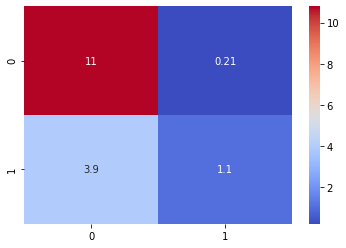

In [30]:
print('Confusion Matrix of KNN Classifier:')
sns.heatmap((temp_cm/19),annot = True,cmap='coolwarm')

In [31]:
f_score_knn = f1_score(y_test2, max_y_test_prediction,average='micro')

print('Maximum F-Score is : '+str(f_score_knn))
print('Average F-Score is : '+str(temp_fscore/19))

Maximum F-Score is : 0.875
Average F-Score is : 0.7401315789473685


# SVM(Support Vector Machine)

In [32]:
classfier_svc = SVC()
classfier_svc.fit(X_train2,y_train2)
print('SVM Classfier')
y_train_prediction_svc = classfier_svc.predict(X_train2)
print('Training accuracy on selected features: %.4f' % (100*acc(y_train2, y_train_prediction_svc)))

y_test_prediction_svc = classfier_svc.predict(X_test2)
print('Testing accuracy on selected features: %.4f' % (100*acc(y_test2, y_test_prediction_svc)))

SVM Classfier
Training accuracy on selected features: 83.6066
Testing accuracy on selected features: 68.7500


In [33]:
cm_svc = confusion_matrix(y_test2, y_test_prediction_svc)
print(cm_svc)

[[11  0]
 [ 5  0]]


<AxesSubplot:>

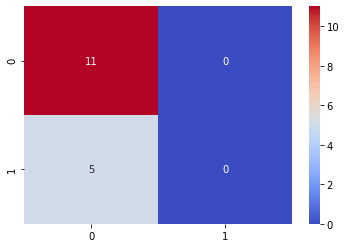

In [34]:
sns.heatmap(cm_svc,annot = True,cmap='coolwarm', fmt = "d")

In [35]:
f_score_knn = f1_score(y_test2, y_test_prediction_svc,average='micro')

print(' F-Score is : '+str(f_score_knn))

 F-Score is : 0.6875


# Backward Feature Selection

In [36]:
backward_start_time = time.time()
feature_selector = SequentialFeatureSelector(SVC(),
                                             k_features = 400,
                                             forward= False,
                                             floating = False,
                                             verbose= 2,
                                             cv = 3,
                                             n_jobs= -1).fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished

[2020-10-21 12:04:42] Features: 499/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 499 out of 499 | elapsed:    1.6s finished

[2020-10-21 12:04:44] Features: 498/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 498 out of 498 | elapsed:    1.6s finished

[2020-10-21 12:04:45] Features: 497/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 497 out of 497 | elapsed:    1.6s finished

[

[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 469 out of 469 | elapsed:    1.6s finished

[2020-10-21 12:05:36] Features: 468/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 468 out of 468 | elapsed:    1.7s finished

[2020-10-21 12:05:37] Features: 467/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 467 out of 467 | elapsed:    1.6s finished

[2020-10-21 12:05:39] Features: 466/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 466 out of 466 | elapsed:    1.7s finished

[2020-10-21 12:05:41] Features: 465/400 -- score: nan[Parallel(n_jobs=-1)]: U

[Parallel(n_jobs=-1)]: Done 438 out of 438 | elapsed:    1.9s finished

[2020-10-21 12:06:27] Features: 437/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 437 out of 437 | elapsed:    1.8s finished

[2020-10-21 12:06:29] Features: 436/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 436 out of 436 | elapsed:    1.7s finished

[2020-10-21 12:06:30] Features: 435/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 435 out of 435 | elapsed:    1.8s finished

[2020-10-21 12:06:32] Features: 434/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(

[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 406 out of 406 | elapsed:    1.6s finished

[2020-10-21 12:07:24] Features: 405/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    1.6s finished

[2020-10-21 12:07:26] Features: 404/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 404 out of 404 | elapsed:    1.6s finished

[2020-10-21 12:07:28] Features: 403/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 403 out of 403 | elapsed:    1.6s finished

[2020-10-21 12:07:29] Features: 402/400 -- score: nan[Parallel(n_jobs=-1)]: U

In [37]:
print('Time taken by Backward Feature Selection is :'+str(int(time.time() - backward_start_time))+' seconds')

Time taken by Backward Feature Selection is :172 seconds


In [38]:
feature_selector.k_feature_names_

('X63380_at',
 'J03027_at',
 'HG1067-HT1067_r_at',
 'X54304_at',
 'Y11180_at',
 'D88152_at',
 'M74096_at',
 'U50929_at',
 'U49785_at',
 'X80026_at',
 'X90392_at',
 'S65738_at',
 'M28209_at',
 'U59423_at',
 'X16504_s_at',
 'D00726_at',
 'L12168_at',
 'M63838_s_at',
 'M96789_at',
 'M73077_at',
 'S77154_s_at',
 'X71348_at',
 'D21878_at',
 'Z19574_rna1_at',
 'D84454_at',
 'M22005_at',
 'U79265_at',
 'X78031_at',
 'U41635_at',
 'AB005535_s_at',
 'X77383_at',
 'M29277_s_at',
 'X15376_at',
 'X80822_at',
 'Y10256_at',
 'D25274_at',
 'X51441_s_at',
 'D49817_at',
 'M36429_s_at',
 'U11292_at',
 'J04760_at',
 'AB002356_s_at',
 'X70218_at',
 'X78520_at',
 'M68895_rna1_at',
 'U89336_cds3_at',
 'L03427_at',
 'M15205_at',
 'U79293_at',
 'X70394_at',
 'X02910_at',
 'M37400_at',
 'U46689_at',
 'Z84497_s_at',
 'M34079_at',
 'V00572_at',
 'D21261_at',
 'U11313_at',
 'L15409_at',
 'U48959_at',
 'X89894_at',
 'U41898_at',
 'Z83802_at',
 'X03794_s_at',
 'X82153_at',
 'L07807_s_at',
 'U55764_at',
 'U37519_at'

In [39]:
feature_columns = list(feature_selector.k_feature_idx_)
print(feature_columns)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [40]:
X_train3=X_train.iloc[:, feature_columns]
X_train3.head()

,X63380_at,J03027_at,HG1067-HT1067_r_at,X54304_at,Y11180_at,D88152_at,M74096_at,U50929_at,U49785_at,X80026_at,...,X98260_at,M22976_at,X65488_at,U60319_at,U07695_at,L40395_at,HG2465-HT4871_at,Y07566_at,Z50853_at,U49250_at
22,-0.203202,-0.658865,0.222829,1.080672,1.116897,1.138597,-0.638209,0.463561,-0.017135,-0.062529,...,0.671917,1.083756,0.012766,1.176843,-0.831297,-0.193006,-0.429758,-0.120048,-0.215267,-0.117446
41,-0.282597,-0.127574,0.571976,0.164652,-0.248590,1.068443,-1.432570,0.456801,-0.264145,-0.707491,...,1.737499,-0.272705,0.482319,-0.441886,-0.554938,-0.280276,-1.615355,-0.128323,1.235986,-0.361299
50,-0.191072,0.607190,-0.278552,0.452077,-0.556132,1.148618,-0.686352,1.017902,-0.248707,-0.272516,...,4.261755,-0.826705,0.079688,0.674479,-0.660391,0.716062,-0.179465,0.699222,0.394536,-0.022284
38,-1.082071,2.585400,-0.098187,-1.048139,2.162541,-1.316779,3.790957,0.463561,-0.342524,-0.471255,...,0.321219,-0.976117,-1.022882,-1.199419,1.708663,-0.443909,2.468369,0.599916,-0.831010,1.173189
61,-0.541737,-1.337109,-2.009393,-0.786419,0.612528,-4.443624,1.431945,-1.429313,-0.882859,-0.456256,...,-0.900444,0.405526,-1.232426,-3.105214,1.135944,-1.192981,1.704318,-0.459341,-1.159671,1.898799


In [41]:
X_test3=X_test.iloc[:, feature_columns]
X_test3.head()

,X63380_at,J03027_at,HG1067-HT1067_r_at,X54304_at,Y11180_at,D88152_at,M74096_at,U50929_at,U49785_at,X80026_at,...,X98260_at,M22976_at,X65488_at,U60319_at,U07695_at,L40395_at,HG2465-HT4871_at,Y07566_at,Z50853_at,U49250_at
48,-0.421540,0.211547,0.346933,0.372626,-0.679149,0.417017,-1.348320,0.551444,-0.260583,-0.268767,...,-0.757852,-0.501020,0.058844,0.219959,-0.700390,-0.287549,-0.811784,-0.310383,0.590545,-0.480252
74,-0.545045,-1.111028,0.158295,2.118205,-0.777563,0.878026,-0.698388,-0.002897,-0.523031,-0.658744,...,-0.426423,2.020520,-0.308680,-0.354171,-0.618573,0.003353,-0.864477,-0.475892,1.140952,-0.453487
59,-0.666345,0.686318,0.540536,-0.127446,0.440305,-0.424826,0.914406,-0.090781,-0.518281,-0.178772,...,-0.565161,-0.296208,-0.569786,0.243881,0.879585,0.185167,0.018135,-0.326934,-0.149931,0.504081
54,0.219141,-0.037142,0.494204,0.213725,0.194271,0.958202,-1.011318,-0.070500,-0.601410,-0.081278,...,-0.031406,0.288010,0.672114,1.822740,-1.187655,0.446978,-0.574664,0.508886,-0.629062,-0.429697
34,0.230168,-2.083177,-0.561510,-2.109040,-1.122010,-2.208731,1.227337,-0.388232,0.474511,2.543568,...,-0.175925,-0.578244,-0.677301,-2.004797,1.399576,0.141531,-0.008212,-0.525545,-0.662720,0.584374


In [42]:
y_train3 = np.array([a+1 for a in y_train]) 
print(y_train2)

y_test3 = np.array([a+1 for a in y_test])

print(y_test2)

[2 2 2 2 3 2 3 2 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 2 3 2 2 2 3 2 2
 2 2 2 2 3 2 2 2 2 2 2 2 2 3 3 2 2 2 2 3 3 3 2 2]
[2 3 3 2 2 2 3 2 2 3 2 3 2 2 2 2]


# KNN Classifier

In [43]:
temp_fscore=0
temp_cm = np.zeros([2,2])

sum =0
for i in range(1,20):
    classfier = KNeighborsClassifier(n_neighbors=i)
    classfier.fit(X_train3, y_train3) 
    print('KNN Classfier for '+str(i)+ ' neighbors:')
    y_train_prediction = classfier.predict(X_train3)
    print('Training accuracy on selected features for '+str(i)+ ' neighbors: %.4f' % (100*acc(y_train3, y_train_prediction)))

    y_test_prediction = classfier.predict(X_test3)
    print('Testing accuracy on selected features for '+str(i)+ ' neighbors: %.4f' %(100*acc(y_test3, y_test_prediction)))
    
    f_score_knn = f1_score(y_test3, y_test_prediction,average='micro')
    temp_fscore= temp_fscore + f_score_knn
    
    cm = confusion_matrix(y_test3, y_test_prediction)
    cm= np.array(cm)
    temp_cm = temp_cm + cm
    
    sum = sum + 100*acc(y_test3, y_test_prediction)
    if i !=1:
        if max_test_accuracy < (100*acc(y_test3, y_test_prediction)):
            max_test_accuracy = (100*acc(y_test3, y_test_prediction))
            max_y_test_prediction = y_test_prediction
            index = i
    else:
        max_test_accuracy = (100*acc(y_test3, y_test_prediction))
        max_y_test_prediction = y_test_prediction
        index = i

print('Average Testing accuracy obtained on selected features by KNN Classifier: %.4f' % (sum/19))                        
print('Maximum Testing accuracy obtained on selected features for '+str(index)+ ' neighbors: %.4f' % max_test_accuracy)                   

KNN Classfier for 1 neighbors:
Training accuracy on selected features for 1 neighbors: 100.0000
Testing accuracy on selected features for 1 neighbors: 68.7500
KNN Classfier for 2 neighbors:
Training accuracy on selected features for 2 neighbors: 88.5246
Testing accuracy on selected features for 2 neighbors: 93.7500
KNN Classfier for 3 neighbors:
Training accuracy on selected features for 3 neighbors: 90.1639
Testing accuracy on selected features for 3 neighbors: 87.5000
KNN Classfier for 4 neighbors:
Training accuracy on selected features for 4 neighbors: 88.5246
Testing accuracy on selected features for 4 neighbors: 87.5000
KNN Classfier for 5 neighbors:
Training accuracy on selected features for 5 neighbors: 90.1639
Testing accuracy on selected features for 5 neighbors: 93.7500
KNN Classfier for 6 neighbors:
Training accuracy on selected features for 6 neighbors: 83.6066
Testing accuracy on selected features for 6 neighbors: 93.7500
KNN Classfier for 7 neighbors:
Training accuracy on

In [44]:
cm = confusion_matrix(y_test3, max_y_test_prediction)
print('Maximum Confusion matrix :',cm)
print('Average Confusion matrix is :',(temp_cm/19))

Maximum Confusion matrix : [[11  0]
 [ 1  4]]
Average Confusion matrix is : [[10.73684211  0.26315789]
 [ 3.15789474  1.84210526]]


Confusion Matrix of KNN Classifier:


<AxesSubplot:>

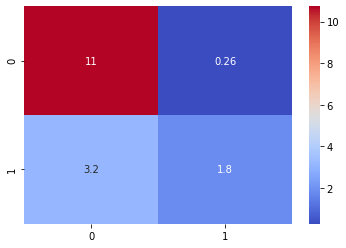

In [45]:
print('Confusion Matrix of KNN Classifier:')
sns.heatmap((temp_cm/19),annot = True,cmap='coolwarm')

In [46]:
f_score_knn = f1_score(y_test3, max_y_test_prediction,average='micro')

print('Maximum F-Score is : '+str(f_score_knn))
print('Average F-Score is : '+str(temp_fscore/19))

Maximum F-Score is : 0.9375
Average F-Score is : 0.7861842105263158


# SVM(Support Vector Machine)

In [47]:
classfier_svc = SVC()
classfier_svc.fit(X_train3,y_train3)
print('SVM Classfier')
y_train_prediction_svc = classfier_svc.predict(X_train3)
print('Training accuracy on selected features: %.4f' % (100*acc(y_train3, y_train_prediction_svc)))

y_test_prediction_svc = classfier_svc.predict(X_test3)
print('Testing accuracy on selected features: %.4f' % (100*acc(y_test3, y_test_prediction_svc)))

SVM Classfier
Training accuracy on selected features: 86.8852
Testing accuracy on selected features: 68.7500


In [48]:
cm_svc = confusion_matrix(y_test3, y_test_prediction_svc)
print(cm_svc)

[[11  0]
 [ 5  0]]


<AxesSubplot:>

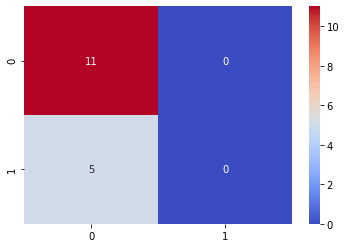

In [49]:
sns.heatmap(cm_svc,annot = True,cmap='coolwarm', fmt = "d")

In [50]:
f_score_knn = f1_score(y_test3, y_test_prediction_svc,average='micro')

print(' F-Score is : '+str(f_score_knn))

 F-Score is : 0.6875
